In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, experimental, Conv2D
from tensorflow.keras.layers import Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
# load model without classifier layers

batch_size = 32
img_height = 100
img_width = 100
count = 0;

model = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
# freeze the layers of the VGG16
for layer in model.layers:
    layer.trainable = False

data_augmentation = experimental.preprocessing.RandomFlip()(model.layers[-1].output)
data_augmentation = experimental.preprocessing.RandomRotation(.2)(data_augmentation)
conv = Conv2D(256, (3,3), activation='relu')(data_augmentation)
globPool = GlobalAveragePooling2D()(conv)
flat1 = Flatten()(globPool)
drop = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu')(drop)
class2 = Dense(512, activation='tanh')(class1)
output = Dense(3, activation='softmax')(class2)

model = Model(model.inputs, output)
# summarize
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [8]:
train_ds = image_dataset_from_directory(
  "imgs4/",
  validation_split=0.3,
  subset="training",
  #color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5001 files belonging to 3 classes.
Using 3501 files for training.


In [9]:
val_ds = image_dataset_from_directory(
  "imgs4/",
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
class_names

Found 5001 files belonging to 3 classes.
Using 1500 files for validation.


['Good', 'No Mask', 'Nose']

In [10]:
from tensorflow import losses
model.compile(
  optimizer='adam',
  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [11]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=12
)

Epoch 1/12
110/110 [==============================] - 129s 1s/step - loss: 0.8819 - accuracy: 0.6555 - val_loss: 0.8514 - val_accuracy: 0.6820

In [26]:
for layer in model.layers:
    layer.trainable = True

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1
)

89/89 [==============================] - 103s 1s/step - loss: 0.6995 - accuracy: 0.8390 - val_loss: 0.6920 - val_accuracy: 0.8481

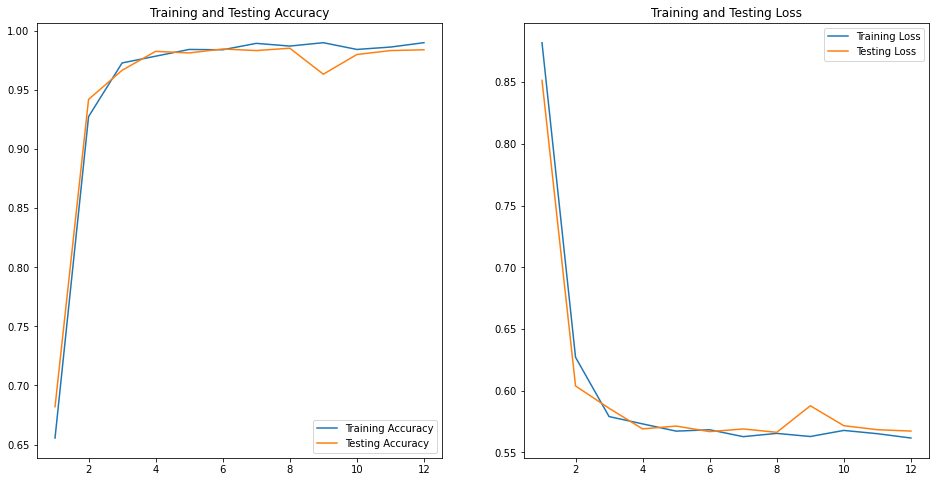

In [12]:
import matplotlib.pyplot as plt
epochs = 12
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,epochs+1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.savefig('pic.png')
plt.show()



In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
one = load_img(
    "testing/test4.jpg", target_size=(img_height, img_width))

two = load_img(
    "testing/test4.jpg", target_size=(img_height, img_width))

three = load_img(
    "testing/test4.jpg", target_size=(img_height, img_width))

one = np.array([img_to_array(one)])
two = np.array([img_to_array(two)])
three = np.array([img_to_array(three)])

one = model.predict(one)
two = model.predict(two)
three = model.predict(three)

print(one, "\n", two, '\n', three)


[[9.9979120e-01 4.9495088e-07 2.0836979e-04]] 
 [[9.9979120e-01 4.9495088e-07 2.0836979e-04]] 
 [[9.9979120e-01 4.9495088e-07 2.0836979e-04]]
